# Bike Sharing - Case Study

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes. 
- How well those variables describe the bike demands

#### Business Goal:
- Build a model that predicts demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. 
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.  

In [1]:
#imporitng required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the csv file using pandas
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Shape of the dataframe
df.shape

(730, 16)

In [4]:
#Size of the dataframe
df.size

11680

In [5]:
#Lets check dtypes and columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Description of the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Drop unwanted columns
# Need to see correlation between temp and atemp to drop any one column
df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [8]:
#Check null values
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [9]:
#Checking data types
#We can see integer type for categorical variables season, mnth, weekday and weathersit, etc.,
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [10]:
# As we can see many columns has categorical values but in terms of integers like season, mnth, weekday, weathersit, etc.,
# Let convert these into meaningful values

df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)
df['mnth'].replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'}, inplace = True)
df['weekday'].replace({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"},inplace = True)
df['weathersit'].replace({1:"Clear", 2:"Mist_cloudy", 3:"Light_Snow_Rain", 4:'Heavy_Snow_Rain'},inplace = True)

In [11]:
#We can observe the changes for categorical columns
df.head(15)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,Thursday,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,Sunday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,Monday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


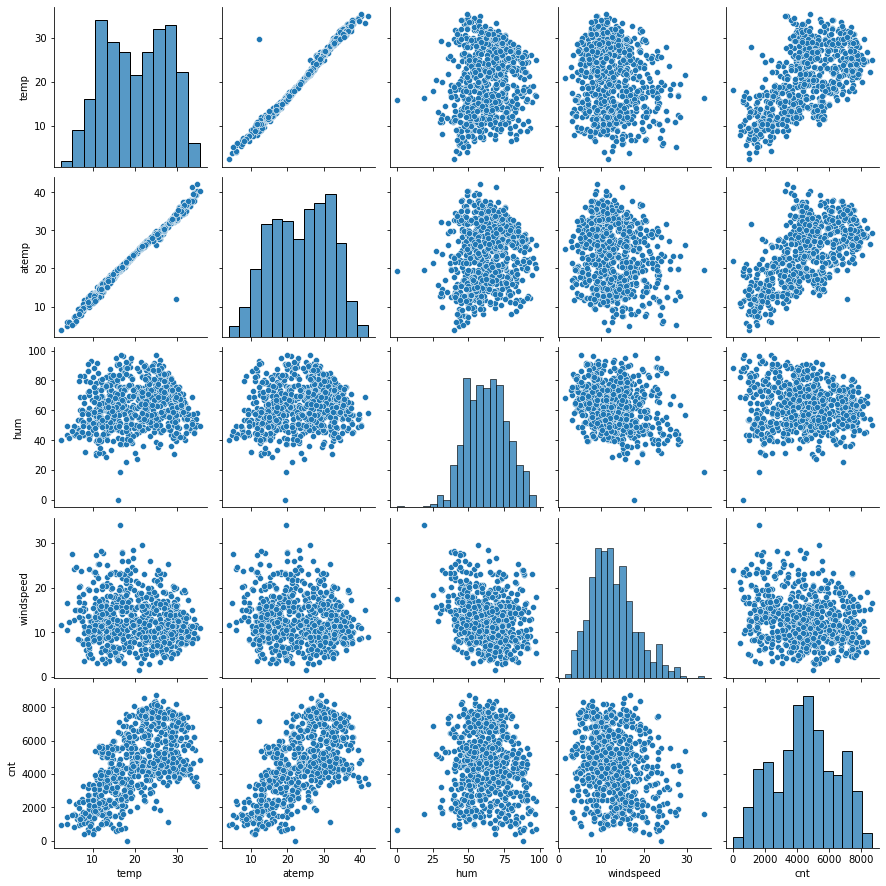

In [12]:
# Checking data distribution for each numerical column
sns.pairplot(df, vars = ['temp','atemp','hum','windspeed',"cnt"])
plt.show()

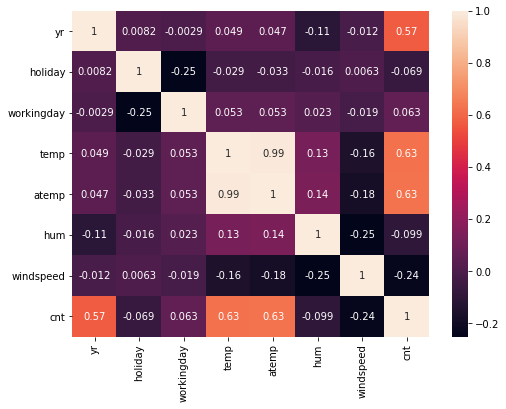

In [13]:
#Also by using heatmap

plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [14]:
# As we can see from above heatmap, temp and atemp are 99% ~ 100% correlated and also with target variable cnt, so we can drop one from it.

df.drop(['atemp'], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


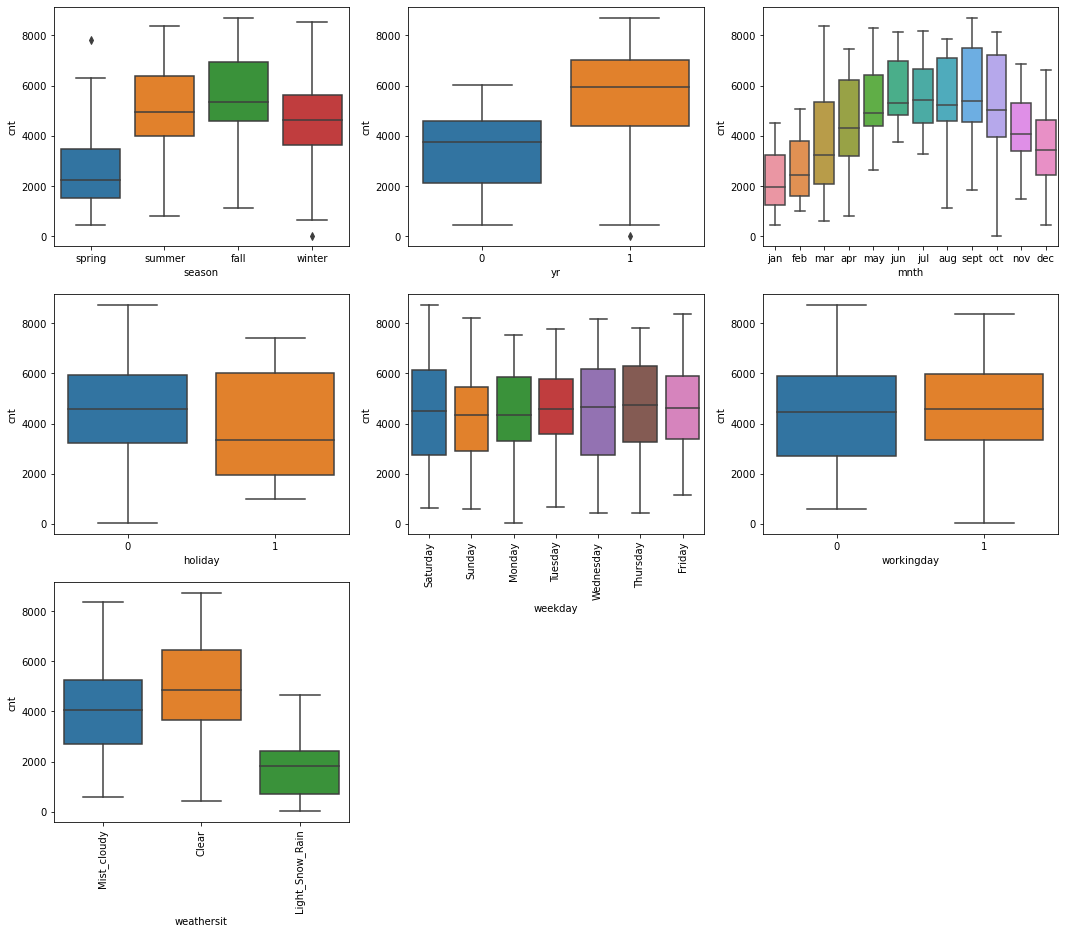

In [15]:
# We can use boxplot to analyse the categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

plt.figure(figsize=(18, 15))
for indx, i in enumerate(cat_vars):
    plt.subplot(3, 3, indx+1)
    sns.boxplot(data = df, x = i, y = 'cnt')
    if i in ['weekday', 'weathersit']:
        plt.xticks(rotation = 90)
plt.show()

In [16]:
# Converting categorical variables into numerical values through binary values 
df = pd.get_dummies(data = df, columns = ["season","mnth","weekday", "weathersit"], drop_first=True)
df

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
#Columns after creating dummies 
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_cloudy'],
      dtype='object')

## Data splitting for model building

In [18]:
#Shape of the dataframe
df.shape

(730, 29)

In [19]:
#Train Test split with 70:30 ratio

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [20]:
#Let us scale down numerical variables

scaler = MinMaxScaler()
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the Model

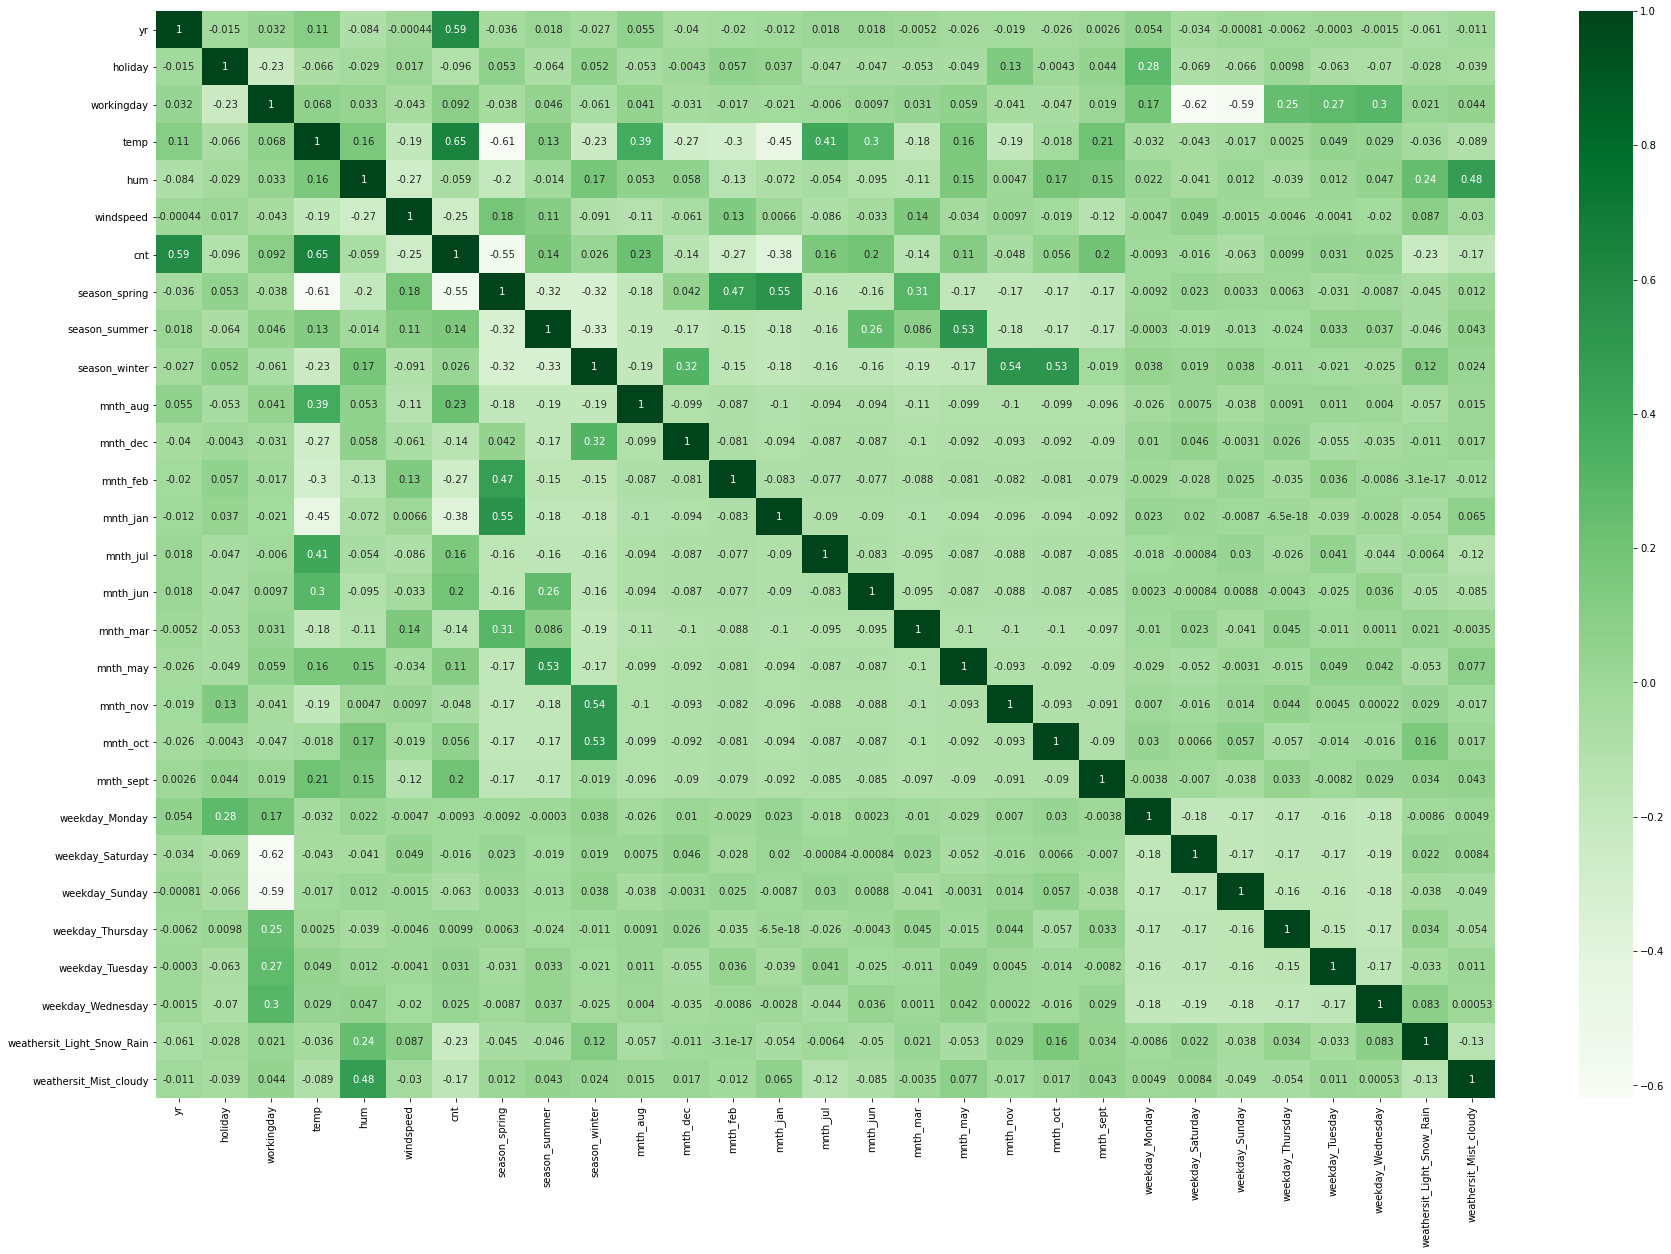

In [22]:
#Lets check correlation between features using heatmap

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap ='Greens')
plt.show()

In [23]:
#How variables looks now
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
#columns in a datarame
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [25]:
#Lets divide independent and dependent variables
y_train = df_train.pop('cnt')
X_train = df_train

# Model building

In [26]:
#import required libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
#Output variables = All
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, step=len(X_train.columns))
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 2),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 2),
 ('weekday_Tuesday', False, 2),
 ('weekday_Wednesday', False, 2),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [29]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_sept',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Will write function for model and VIF as we use them several times

In [31]:
#For model building
def model(vars):
    X_train_sm = sm.add_constant(vars)
    lr = sm.OLS(y_train, X_train_sm)
    lr_model = lr.fit()
    return lr_model, X_train_sm

In [32]:
# For VIF
def vif(vars):    
    vif = pd.DataFrame()
    df1 = vars
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

For manual selection of variables:
Points to remember:

- High p-value, high VIF
- High-low:
    - High p, low VIF: remove these first
    - Low p, high VIF: remove these after the ones above
- Low p, low VIF

In [33]:
#Will build model with rfe support features as they give best results
rfe_vars = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_vars]

In [34]:
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_winter,mnth_jan,mnth_sept,weekday_Saturday,weekday_Sunday,weathersit_Light_Snow_Rain,weathersit_Mist_cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,0,0,1,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,0,0,0,0,1


In [35]:
# 1st iteration, with all best variables from rfe
lr_model1, X_train_sm1 = model(X_train_rfe)
print(lr_model1.summary())
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          8.66e-191
Time:                        00:55:57   Log-Likelihood:                 513.37
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     496   BIC:                            -939.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,workingday,33.92
10,weekday_Saturday,8.36
11,weekday_Sunday,8.17
1,holiday,2.23
4,hum,1.88
3,temp,1.71
13,weathersit_Mist_cloudy,1.56
8,mnth_jan,1.55
7,season_winter,1.50
6,season_summer,1.28


In [36]:
# 2nd iteration
#High p, low vif : so dropping holiday
X_train_rfe2 = X_train_rfe.drop(['holiday'], axis=1)

In [37]:
lr_model2, X_train_sm2 = model(X_train_rfe2)
print(lr_model2.summary())
vif(X_train_rfe2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          8.66e-191
Time:                        00:55:57   Log-Likelihood:                 513.37
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     496   BIC:                            -939.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
3,hum,27.02
1,workingday,16.01
2,temp,10.83
9,weekday_Saturday,4.35
4,windspeed,4.33
10,weekday_Sunday,4.25
12,weathersit_Mist_cloudy,2.21
0,yr,2.07
6,season_winter,1.95
5,season_summer,1.70


In [38]:
#3rd iteration
#low p, high vif : so dropping hum
X_train_rfe3 = X_train_rfe2.drop(['hum'], axis=1)

In [39]:
lr_model3, X_train_sm3 = model(X_train_rfe3)
print(lr_model3.summary())
vif(X_train_rfe3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.6
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          3.49e-188
Time:                        00:55:57   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     497   BIC:                            -927.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
1,workingday,10.87
2,temp,8.48
3,windspeed,4.33
8,weekday_Saturday,3.25
9,weekday_Sunday,3.03
0,yr,2.06
5,season_winter,1.69
4,season_summer,1.68
11,weathersit_Mist_cloudy,1.59
6,mnth_jan,1.49


In [40]:
#4th iteration
#low p, high vif : so dropping workingday
X_train_rfe4 = X_train_rfe3.drop(['workingday'], axis=1)

In [41]:
lr_model4, X_train_sm4 = model(X_train_rfe4)
print(lr_model4.summary())
vif(X_train_rfe4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.0
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          5.30e-186
Time:                        00:55:57   Log-Likelihood:                 496.38
No. Observations:                 510   AIC:                            -968.8
Df Residuals:                     498   BIC:                            -918.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
1,temp,3.87
2,windspeed,3.37
0,yr,2.04
3,season_summer,1.62
10,weathersit_Mist_cloudy,1.53
4,season_winter,1.44
5,mnth_jan,1.22
7,weekday_Saturday,1.21
6,mnth_sept,1.20
8,weekday_Sunday,1.20


In [42]:
#5th iteration
#high p, low vif : so dropping weekday_Saturday
X_train_rfe5 = X_train_rfe4.drop(['weekday_Saturday'], axis=1)

In [43]:
lr_model5, X_train_sm5 = model(X_train_rfe5)
print(lr_model5.summary())
vif(X_train_rfe5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.1
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          8.04e-187
Time:                        00:55:57   Log-Likelihood:                 495.46
No. Observations:                 510   AIC:                            -968.9
Df Residuals:                     499   BIC:                            -922.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
1,temp,3.83
2,windspeed,3.31
0,yr,2.04
3,season_summer,1.62
9,weathersit_Mist_cloudy,1.53
4,season_winter,1.43
5,mnth_jan,1.21
6,mnth_sept,1.20
7,weekday_Sunday,1.16
8,weathersit_Light_Snow_Rain,1.08


- Now we can observe that all variables p-values are < 0.05 and vif < 5
- This confirms that, we can stop iterating and removing variables at this point.
#### So final model details are like:
- R-squared:                       0.833
- Adj. R-squared:                  0.830
- F-statistic:                     249.1

In [44]:
#Final Features and coefficients
lr_model5.params

const                         0.155797
yr                            0.234075
temp                          0.521582
windspeed                    -0.163188
season_summer                 0.081859
season_winter                 0.117836
mnth_jan                     -0.046943
mnth_sept                     0.093633
weekday_Sunday               -0.046672
weathersit_Light_Snow_Rain   -0.285066
weathersit_Mist_cloudy       -0.077609
dtype: float64

# Prediction

## Transforming test data

In [45]:
#Scaling the test dataset
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_cloudy
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.777843,0.443398,0.278853,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
#Divide x_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          220 non-null    int64  
 1   holiday                     220 non-null    int64  
 2   workingday                  220 non-null    int64  
 3   temp                        220 non-null    float64
 4   hum                         220 non-null    float64
 5   windspeed                   220 non-null    float64
 6   season_spring               220 non-null    uint8  
 7   season_summer               220 non-null    uint8  
 8   season_winter               220 non-null    uint8  
 9   mnth_aug                    220 non-null    uint8  
 10  mnth_dec                    220 non-null    uint8  
 11  mnth_feb                    220 non-null    uint8  
 12  mnth_jan                    220 non-null    uint8  
 13  mnth_jul                    220 n

In [48]:
#We can remove the variables from test set similar to train set
X_test_rfe5 = X_test[X_train_rfe5.columns]
X_test_rfe5.head()

,yr,temp,windspeed,season_summer,season_winter,mnth_jan,mnth_sept,weekday_Sunday,weathersit_Light_Snow_Rain,weathersit_Mist_cloudy
184,0,0.837241,0.149393,0,0,0,0,0,0,1
535,1,0.911423,0.231142,1,0,0,0,0,0,0
299,0,0.496221,0.443398,0,1,0,0,0,0,1
221,0,0.890387,0.449707,0,0,0,0,0,0,0
152,0,0.821739,0.682387,1,0,0,0,0,0,0


In [49]:
#Prediction
X_test_sm5 = sm.add_constant(X_test_rfe5)
y_test_pred = lr_model5.predict(X_test_sm5)

In [50]:
#Actual test data
y_test

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
         ...   
702    0.775082
127    0.489314
640    0.896530
72     0.201785
653    0.891753
Name: cnt, Length: 220, dtype: float64

In [51]:
#Predicted test data
y_test_pred

184    0.490499
535    0.909394
299    0.382487
221    0.546820
152    0.554903
         ...   
702    0.707964
127    0.468672
640    0.800639
72     0.267026
653    0.699428
Length: 220, dtype: float64

## LR Properties Perification

## 1. Error terms normal distribution

In [52]:
y_train_pred = lr_model5.predict(X_train_sm5)

In [53]:
residual = y_train - y_train_pred

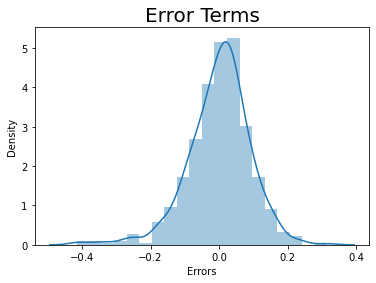

In [54]:
# Plot distribution for error
fig = plt.figure()
sns.distplot(residual, bins = 20)
plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors')
plt.show()

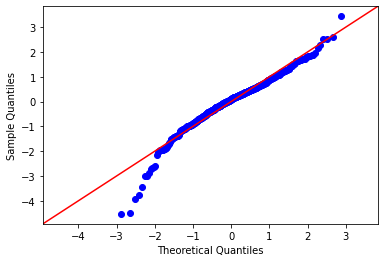

In [55]:
#Residual relationship
sm.qqplot(residual, fit = True, line = "45")
plt.show()

## 2. Homoscedasticity

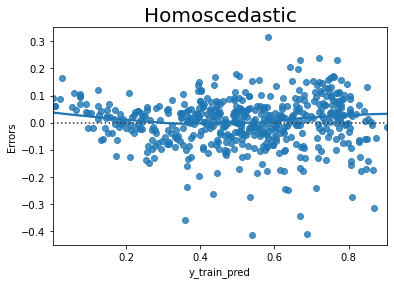

In [56]:
sns.residplot(y_train_pred, residual,lowess=True)
plt.title('Homoscedastic', fontsize = 20)
plt.xlabel('y_train_pred')
plt.ylabel('Errors')
plt.show()

## 3. Linear relationship

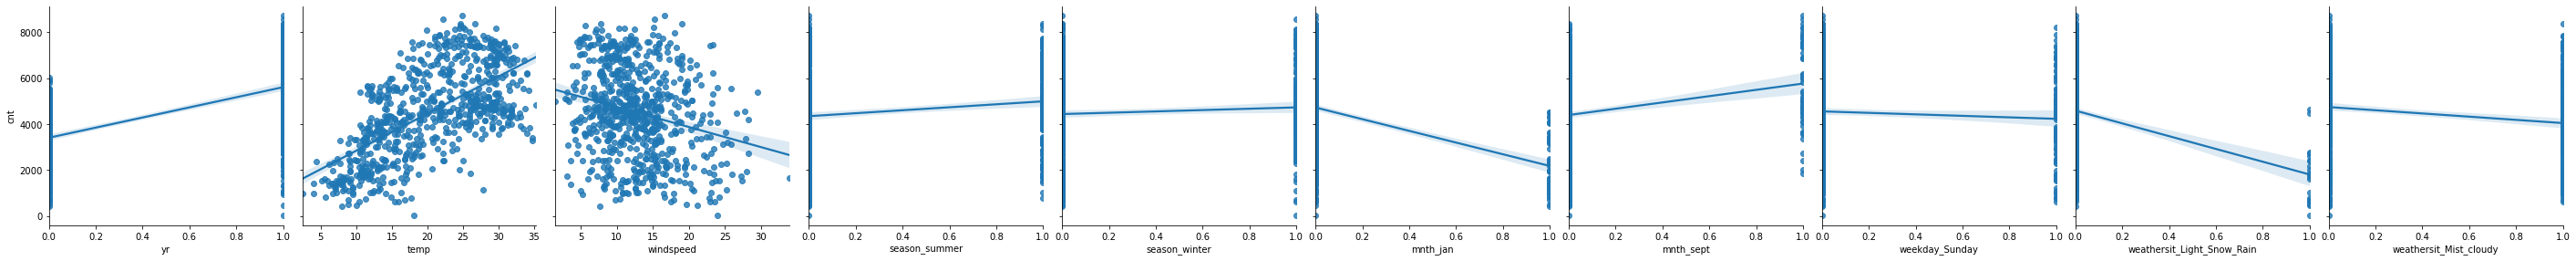

In [57]:
sns.pairplot(df, x_vars = X_train_rfe5.columns, y_vars='cnt', size=4, aspect = 1, kind='reg', diag_kind=None)

## 4. Independence of Errors - Autocorrelation

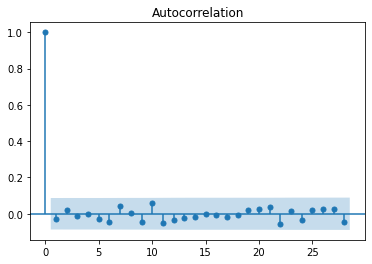

In [58]:
import statsmodels.tsa.api as smt
smt.graphics.plot_acf(residual, alpha=0.05)
plt.show()

## 5. Multicollinearity

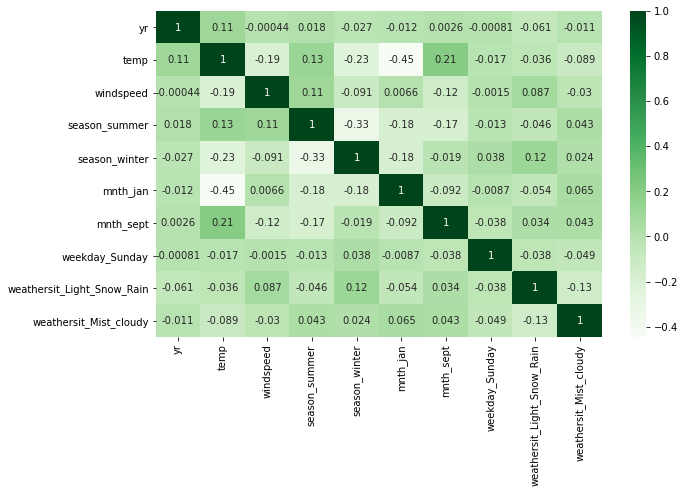

In [59]:
plt.figure(figsize = (10,6))
sns.heatmap(X_train_rfe5.corr(), annot = True, cmap="Greens")
plt.show()

# Model Evaluation

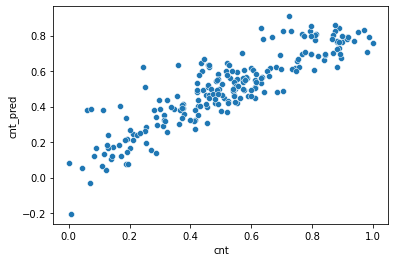

In [60]:
fig = plt.figure()
sns.scatterplot(y_test, y_test_pred)
plt.ylabel('cnt_pred')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

#Model metrics for train dataset
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_train_pred))
# R-squared
r2 = r2_score(y_train, y_train_pred)
print("R-squared: %.2f" % r2 )
#Adjusted R-squared
adj_r2 = 1 - ((1-r2) * ((X_train_rfe5.shape[0]-1) / (X_train_rfe5.shape[0] - X_train_rfe5.shape[1]-1)))
print("Adjusted R-squared: %.2f" % adj_r2)

Mean squared error: 0.01
R-squared: 0.83
Adjusted R-squared: 0.83


In [62]:
#Model metrics for test dataset
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
# R-squared
r2 = r2_score(y_test, y_test_pred)
print("R-squared: %.2f" % r2)
#Adjusted R-squared
adj_r2 = 1 - ((1-r2) * ((X_test_rfe5.shape[0]-1) / (X_test_rfe5.shape[0] - X_test_rfe5.shape[1]-1)))
print("Adjusted R-squared: %.2f" % adj_r2)

Mean squared error: 0.01
R-squared: 0.78
Adjusted R-squared: 0.77


# Conclusion:

### The equation that we can form from above final model:
cnt = 0.155797 + 0.234075*yr + 0.521582*temp - 0.163188*windspeed + 0.081859*season_summer + 0.117836*season_winter - 0.046943*mnth_jan + 0.093633*mnth_sept - 0.046672*weekday_Sunday - 0.285066*weathersit_Light_Snow_Rain - 0.077609*weathersit_Mist_cloudy

##### Train dataset:
- R-squared value is 0.83
- Adjusted R-squared value is 0.83

##### Test dataset:
- R-squared value is 0.78
- Adjusted R-squared value is 0.77

### Top features:

- As we can observe from above model coefficients, the top 3 highly correlated variables with target variable is:
1. temp (0.521582)
2. yr (0.234075)
3. season_winter (0.117836)

- Other top features are like:
4. mnth_sept (0.093633)
5. season_summer (0.081859)